# Generador Unix
Utilizando el generador UNIX de números aleatorios, pero con los coeficientes del generador Visual Basic, programe una serie de 60 números aleatorios en hoja de cálculo, verificando que, a igual semilla corresponde igual serie.
Utilice como “Blanco” una serie del mismo tamaño generada con una macro en Visual Basic for Apps con la misma semilla (NOTA: las series no darán los mismos valores, aunque usen la misma semilla porque los algoritmos son diferentes)


- 1) Demuestre que con semillas aleatorias esa serie no se repite.
- 2) Utilizando la prueba de Chi cuadrado demuestre que se trata de una serie uniforme
- 3) Haga las dos pruebas anteriores para la serie “VBA”
- 4) Conclusiones

_Obtener conclusiones, por ejemplo, calcular el promedio y la desviación estándar de ambas
muestras y hacer análisis de varianza para determinar si las medias son iguales o no._

Datos para construir el generador: 
- m = 2^24
- a = 1140671485 
- b = 12820163

In [2]:
import numpy as np
from scipy.stats import chi2
from random import randint
import matplotlib.pyplot as plt
from scipy.stats import norm

np.set_printoptions(formatter={'float': lambda x: "{0:0.20f}".format(x)})

a = 1140671485
b = 12820163
m = 2**24

def semillar(X,tantos):
    semillas = np.random.rand(X, tantos)
    semillas.dtype = np.float64
    r = np.zeros((X, tantos))
    r.dtype = np.float64
    for j in range(0,tantos):
        oldSeed = np.random.randint(0,m)
        for i in range(0,X):
            newSeed = (a*oldSeed+b) % m
            oldSeed = newSeed
            semillas[i,j] = newSeed
            r[i,j] = semillas[i,j] / m
    return r

def agrupar(N,Q):
    g = np.zeros((N,Q.shape[1]))
    incremento = 1.0/np.float64(N)
    for i in range(0,ensayos):
        for j in range(0,serie):
            aux = 0
            for k in range(0,N):
                aux += incremento
                if Q[j,i] <= aux and Q[j,i] > (aux-incremento):
                    g[k,i] += 1
    return g

def chiCuadrado(r):
    chi = np.zeros((divIn,r.shape[1]))
    FE = (serie/np.float64(divIn))
    for i in range(0,r.shape[1]):
        for j in range(0,divIn):
            chi[j,i] = ((FE-r[j,i])**2)/FE
    return chi.sum(0)

# El programa

In [3]:
serie = 60
ensayos = 5000
resultados = semillar(serie,ensayos)
' divIn = np.int(np.sqrt(serie).round()) '
divIn = 10
grupos = agrupar(divIn,resultados)

In [6]:
resultados.shape

(60, 5000)

# Pruebas
## Medias

In [7]:
av = resultados.mean(0).mean()
print 'Media:',av
print 'Error:', (0.5-av)

Media: 0.500023711415
Error: -2.37114151319e-05


## Evaluar Varianza y Desviacion

In [8]:
print 'Varianza media:',resultados.var(0).mean()
print 'Desviacion media:',resultados.std(0).mean()

Varianza media: 0.0819381533413
Desviacion media: 0.285754606347


## Evaluar Chi
La prueba Chi-Cuadrada en lugar de medir la diferencia de cada punto entre la muestra y la desviación verdadera, checa la desviación del valor esperado.

    n
X2 =∑ (Oi−Ei)^2/Ei

    i 

Donde n es el número de intervalos de clase (ejemplo: Oi es el número observado en la clase i, y Ei es el número esperado en cada clase i , y n es el número de clases. Para una distribución uniforme, Ei , el número en cada clase esta dado por;

* Ei = N / n

_Para clases igualmente espaciadas, donde N es el número total de observaciones. Puede ser mostrado que la distribución de la muestra Chi-Cuadrada esta aproximadamente a la distribución Chi-Cuadrada con n-1 grados de libertad._


In [9]:
p=0.95
gradosDeLibertad = divIn-1
print 'Chi2 Observado | Inverso de Chi2'
print '   {0:0.05f}    |    {1:0.09f} '.format(chiCuadrado(grupos).mean(),chi2.ppf(p, gradosDeLibertad))
print'\nConfianza(%):',p
print 'Grados de Libertad:',gradosDeLibertad

Chi2 Observado | Inverso de Chi2
   8.94100    |    16.918977605 

Confianza(%): 0.95
Grados de Libertad: 9


**Debido a que X2calculada < que el valor de X2(0.95,9) de la tabla, la hipótesis Nula de que no existe diferencia entre la distribución de la muestra y la distribución uniforme se Acepta.**

_ el estadístico chi-cuadrado cuantifica qué tanto varía la distribución observada de conteos con respecto a la distribución hipotética._

Chi Inversa me dice para una distribución chi-cuadrado de k grados de libertad, cual es el valor de x que deja a su izquierda una probabilidad p.



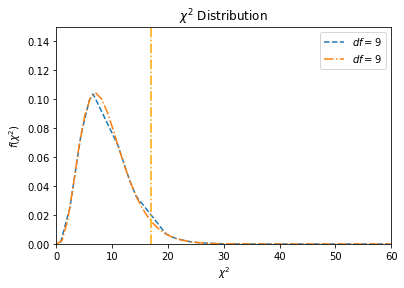

In [13]:
x = np.linspace(0, serie, serie)
obtenido = resultados[:,np.random.randint(0,ensayos)]*serie
fig,ax = plt.subplots(1,1)
obtenido.sort()

linestyles = ['--', '-.']
deg_of_freedom = divIn-1
comparar = [obtenido,x]
for comp, ls in zip(comparar, linestyles):
  ax.plot(comp, chi2.pdf(comp, deg_of_freedom), linestyle=ls, label=r'$df=%i$' % deg_of_freedom)

plt.xlim(0, serie)
plt.ylim(0, 0.15)

plt.axvline(x=chi2.ppf(p, gradosDeLibertad),linestyle='-.',color='orange')
plt.xlabel('$\chi^2$')
plt.ylabel(r'$f(\chi^2)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')

plt.legend()
plt.show()

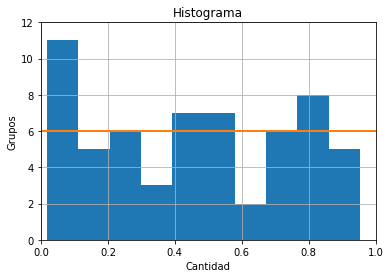

In [12]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

mediaDeGrupos = grupos[:,:].mean(axis=1)

plt.hist(resultados[:,np.random.randint(0,ensayos)])

mm = serie*ensayos

plt.plot(np.repeat(6,serie), linewidth=2)
plt.xlabel('Cantidad')
plt.ylabel('Grupos')
plt.title('Histograma')
plt.axis([0, 1, 0, 12])
plt.grid(True)

plt.show()

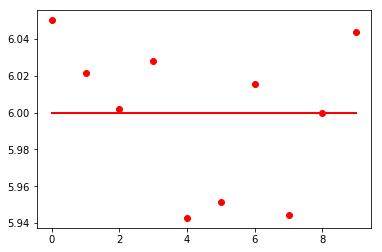

In [15]:
plt.plot(mediaDeGrupos,'ro')
plt.plot(np.repeat(6,divIn), linewidth=2, color='red')
plt.show()

## EXPORTAR

In [10]:
import pandas as pd 
df = pd.DataFrame(resultados)
df.to_csv("exportarPython.csv",sep=';',header=None)